Vamos fazer uma análise de dados de vendas.

O usuário Gregory Smith do Kaggle postou um dataset bem legal sobre vendas de jogos ao redor do mundo. 
Podemos realizar o download do arquivo aqui:
    https://www.kaggle.com/datasets/gregorut/videogamesales

Importando as bibliotécas para iniciar o trabalho de tratamento dos dados

In [4]:
# serve para fazer que os gráficos gerados sejam apresentados dentro do notebook e não fora
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot') # O estilo adiciona cores e padrões diferentes para personalizar seus gráficos. 

In [5]:
# Primeira leitura do arquivo
videogame = pd.read_csv(r'C:\Users\079496631\Documents\Estudos\python\arquivos\vgsales.csv')

Poderiamos usar tanto
videogames.head()

ou
pd.read_csv('nome_do_arquivo').head()

que funcionaria do mesmo jeit

In [9]:
# Verificando as primeiras 10 linhas do arquivo de vendas
videogame.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Uma coisa legal no Jupyter Notebook é a forma de visualizar dados. Em scripts convencionais, você precisa utilizar print('Mensagem ou valor para exibir'). A boa notícia é que no Jupyter, sempre que quiser que algo seja “printado” na tela, tudo que deve fazer é digitar a mensagem ou valor, sem utilizar o print().

In [10]:
# Resumo das informações do dataset
videogame.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


A função describe()traz informações importantes sobre nossos dados, que podem ser usados para gerar estatísticas, por exemplo. Verifique que cada linha da tabela mostra um dado diferente. Na primeira nós temos a count, que realiza uma contagem dos valores existentes no conjunto de dados; a segunda linha — std, ou standard deviation — traz o desvio padrão dos valores; em seguida temos os valores mínimos, quartis e valores máximos de cada coluna.

In [11]:
# Verificar o tipo de dados de cada coluna
videogame.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Conforme a imagem acima, nós criamos uma célula e digitamos a linha videogames.dtypes. Verifique que logo abaixo, o pandas retornou uma tabela com duas colunas, sendo a primeira delas o nome das colunas encontradas em nosso dataset, e a segunda o tipo de dado que a biblioteca reconheceu. No caso da coluna rank, ela foi reconhecida como números inteiros; já a coluna Name está sendo tratada como string — linha de texto, em tradução livre, mas que no pandas é referenciada como object.

In [12]:
# Verificar a quantidade de linhas e colunas no dataframe
videogame.shape

(16598, 11)

O tamanho do dataset
O pandas tem um comando muito legal para caso a gente queira saber o tamanho de Dataframe: o shape. Ele irá retornar uma tuple com dois valores, cujo o primeiro representa a quantidade de linhas, e o segundo, a quantidade de colunas de nossa tabela.

In [13]:
# Renomeando colunas
videogame.columns = ['Colocação','Nome','Plataforma','Ano','Gênero','Editora','Vendas América do Norte',
                     'Vendas USA','Vendas Japão','Outras Vendas','Vendas Global']
videogame.head(10)

,Colocação,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas USA,Vendas Japão,Outras Vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


NaN — significa Not a Number, ou Não é Número, em tradução livre.

In [14]:
# Verificando linhas onde não há lançamentos definidos
videogame[videogame['Ano'].isnull()].head()

,Colocação,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas USA,Vendas Japão,Outras Vendas,Vendas Global
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


Podemos fazer o tratamento de nulos, daremos andamento em outro momento

In [15]:
# Realizar a contagem de uma coluna, por exemplo saber rapidamente quantos jogos foram lançados para cada plataforma
videogame['Plataforma'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

Feito isso, o pandas lhe retornará uma Serie onde cada linha representa a contagem de jogos lançados para cada plataforma. Os valores ficam ordenados do maior para o menor, permitindo a você uma visualização rápida.

<Axes: >

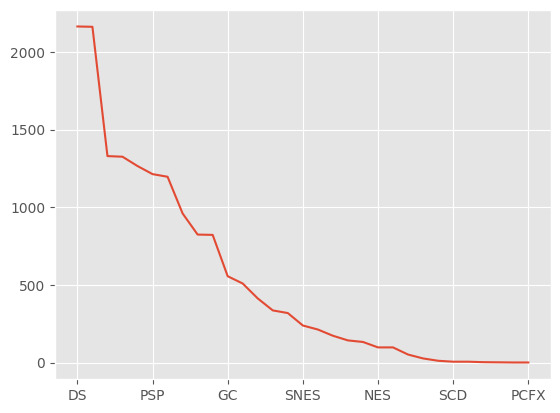

In [17]:
# Gerando gráficos a partir de value_counts()
titulos_lancados = videogame['Plataforma'].value_counts()
titulos_lancados.plot()


<Axes: >

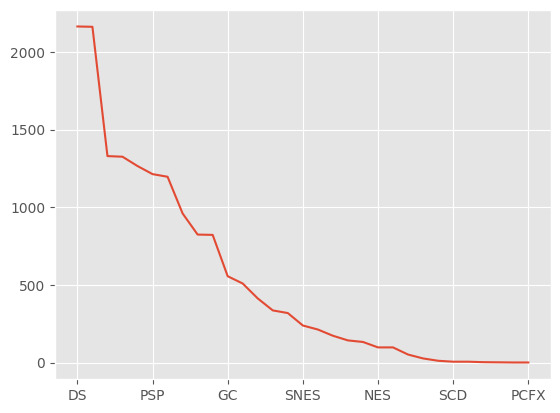

In [18]:
# Podemos gerar o mesmo gráfico fazendo da seguinte forma
videogame['Plataforma'].value_counts().plot()

 função .plot() do pandas irá criar, por padrão, um gráfico de linhas utilizando o index como eixo X — parte debaixo do gráfico — e valores da contagem no eixo Y. A gente tem que convir que esse gráfico está mais feio que bater em mãe, mas graças ao pandas e ao matplotlib, nós podemos deixá-lo com uma melhor aparência.

<Axes: >

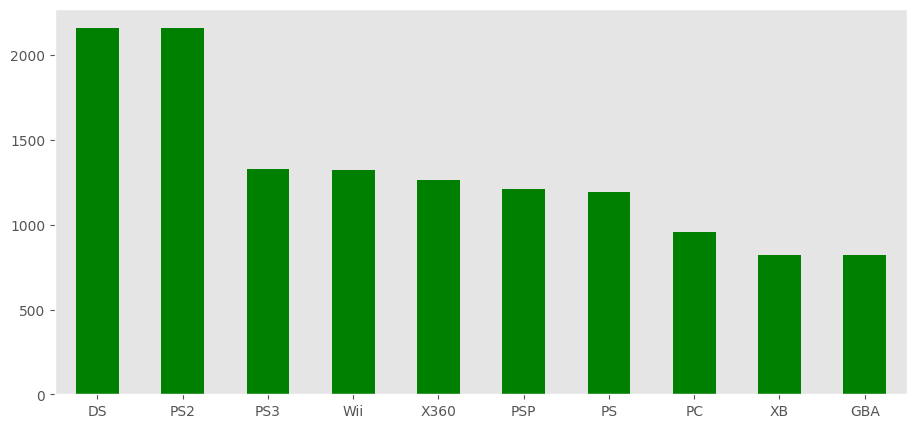

In [19]:
# Gerando o gráfico com mais detalhes
videogame['Plataforma'].value_counts().head(10).plot(kind='bar',figsize=(11,5),grid=False,rot=0,color='green')

kind: informa o tipo de gráfico que queremos criar. Nesse caso, escolher um gráfico de barras, ou "bar";

figsize: informa o tamanho que nosso gráfico terá. Esse valor precisa ser passado em forma de tuple — entre parenteses;

grid: diz se nós queremos que apareça linhas de grade em nosso gráfico. Dependendo da situação, eles são muito úteis, mas aqui não será necessário, portanto, eu informo o valor False;

rot: informa o grau de rotação que nossos dados do eixo X devem ter. Como eu quero que os valores sejam apresentados em linha reta sem inclinação, eu coloquei o valor 0;

color: a cor do gráfico. Dependendo do tipo de gráfico, você pode informar mais de uma cor em formato de lista, por exemplo: ['green', 'red', 'blue']. Eu quero que meu gráfico tenha apenas a cor verde, eu coloco o valor 'green'.

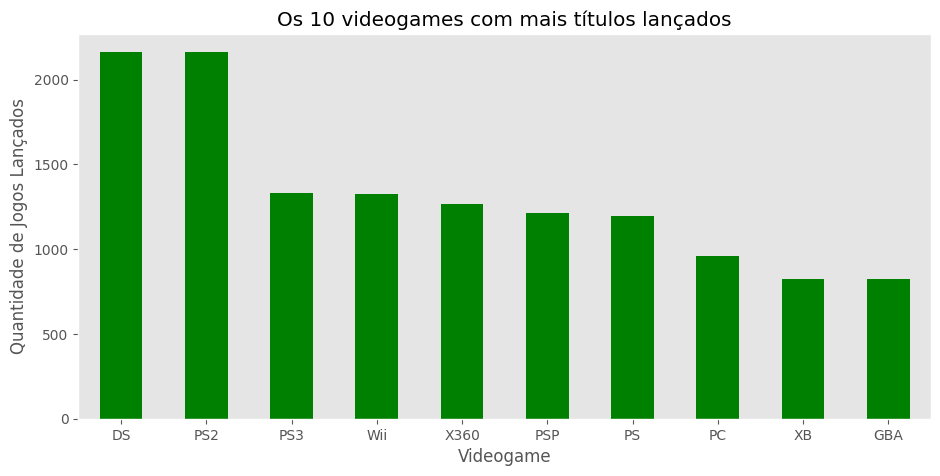

In [21]:
# Complementando o gráfico gerado acima
videogame['Plataforma'].value_counts().head(10).plot(kind='bar',figsize=(11,5),grid=False, rot=0,color='green')
# Enfeitando o gráfico
plt.title('Os 10 videogames com mais títulos lançados')
plt.xlabel('Videogame') # Nomeando o eixo X, onde fica o nome dos videogames
plt.ylabel('Quantidade de Jogos Lançados') # Nomeando o eixo Y, onde fica a quantidade de jogos
plt.show() #exibindo o gráfico

plt.title(): essa função adiciona um título ao seu gráfico. Você deve passar essa informação na forma de string — utilizando aspas simples ou duplas. No meu caso, eu coloquei o título: “Os 10 videogames com mais títulos lançados”;

plt.xlabel(): assim como na função title, os valores dessa função devem ser passados como string. Aqui, você define o título — ou label — que será colocado no eixo X — abaixo dos gráficos. Escolhi a palavra “Videogame”;

plt.ylabel(): exatamente igual a função xlabel(), mas, aqui você diz o que será exibido no eixo Y — na parte esquerda do mapa. Eu coloquei “Quantidade de jogos lançados”;

plt.show(): essa função irá exibir seu gráfico na célula abaixo. Mesmo que você não a digite, seu gráfico será mostrado, contudo, isso facilita a leitura do código e evita que algumas informações inúteis sejam apresentadas na célula, como o tipo de dado do gráfico.